# HomeWork #1 Machine Learning
Stu. name: Seyed Mohammad Amin Dadgar <br>
Stu. no: 4003624016

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import scipy


## Q2

In [53]:
## column names are used from ```pima-indians-diabetes.name``` file
cols = ['pregnancy_count', 'glucose_test', 'blood_pressure', 'triceps_thickness', '2h_insulin', 'mass', 'pedi', 'age', 'label']

df = pd.read_csv('hw1_data/pima/pima-indians-diabetes.data', index_col=False ,names=cols)
df.head()

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
## save the dataset in the right format with its columns for other usages 
df.to_csv('hw1_data/processed/pima-indians-diabetes.csv')

### (a, b)

In [20]:
df.describe()

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
## the variance of each attribute
pd.DataFrame(df.var(), columns=['variance'])

,variance
pregnancy_count,11.354056
glucose_test,1022.248314
blood_pressure,374.647271
triceps_thickness,254.473245
2h_insulin,13281.180078
mass,62.159984
pedi,0.109779
age,138.303046
label,0.227483


### (c)

In [49]:
## Calculating the correlation between 8 attributes (label is outcluded)
attr_corr = df[cols[:-1]].corr()
attr_corr

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age
pregnancy_count,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose_test,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
triceps_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
2h_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


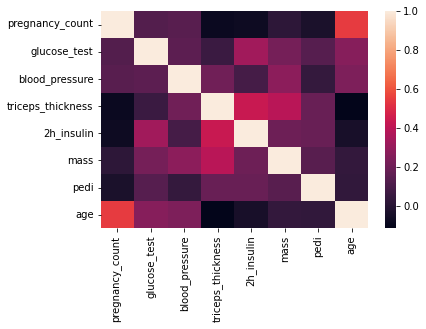

In [52]:
## showing the heatmap for better visualization
sns.heatmap(attr_corr)
plt.show()

In [63]:
label_corr = df.corrwith(df.label).sort_values(ascending=False)
pd.DataFrame(label_corr, columns=['correlation'])

,correlation
label,1.000000
glucose_test,0.466581
mass,0.292695
age,0.238356
pregnancy_count,0.221898
pedi,0.173844
2h_insulin,0.130548
triceps_thickness,0.074752
blood_pressure,0.065068


What we will find out from the correlation matrix with label is the most useful feature (Or the most affective feature ) for the label is *glucose_test*. To find why it is the most helpful attribute we can review the correlation formula with below
\begin{equation}
correlation = \frac{covariance(x,y)}{var(x) var(y)}
\end{equation}
And with this equation it's obvious that if coefficient is positive then the effect of can be if x increases then y is increased. By this reason the biggest value for correlation of a feature with lable can be intrepreted the most helpful feature (attribute).

Also to explain the correlation value of one we can say that, x variable is the same as y in eq(1).

### (d)
If 2 attributes are fully correlated then using both in prediction may make bias and the prediction result would not be helpful. The alternative and the better way for prediction is to use one of the attributes. 

### (f)

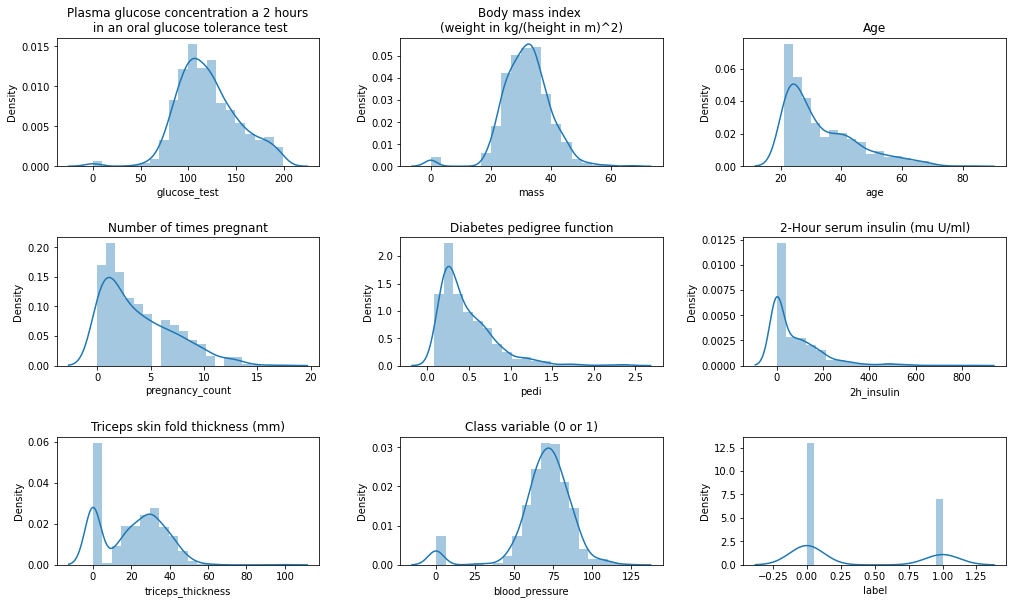

In [106]:
fig, ax = plt.subplots(3, 3, figsize=(15,9))
fig.tight_layout(pad=5)


sns.distplot(df.glucose_test, bins=20, ax=ax[0,0])
ax[0,0].set_title('Plasma glucose concentration a 2 hours\n in an oral glucose tolerance test')

sns.distplot(df.mass, bins=20, ax=ax[0,1])
ax[0, 1].set_title('Body mass index \n(weight in kg/(height in m)^2)')

sns.distplot(df.age, bins=20, ax=ax[0,2])
ax[0, 2].set_title('Age')

sns.distplot(df.pregnancy_count, bins=20, ax=ax[1,0])
ax[1, 0].set_title('Number of times pregnant')

sns.distplot(df.pedi, bins=20, ax=ax[1, 1])
ax[1, 1].set_title('Diabetes pedigree function')

sns.distplot(df['2h_insulin'], bins=20, ax=ax[1, 2])
ax[1, 2].set_title('2-Hour serum insulin (mu U/ml)')

sns.distplot(df.triceps_thickness, bins=20, ax=ax[2, 0])
ax[2, 0].set_title('Triceps skin fold thickness (mm)')

sns.distplot(df.blood_pressure, bins=20, ax=ax[2, 1])
ax[2, 1].set_title('Diastolic blood pressure (mm Hg)')

sns.distplot(df.label, bins=20, ax=ax[2, 2])
ax[2, 1].set_title('Class variable (0 or 1)')

plt.show()


If we look closely we can say that body mass index and the plasma glucose is the most similar to normal distribution. 

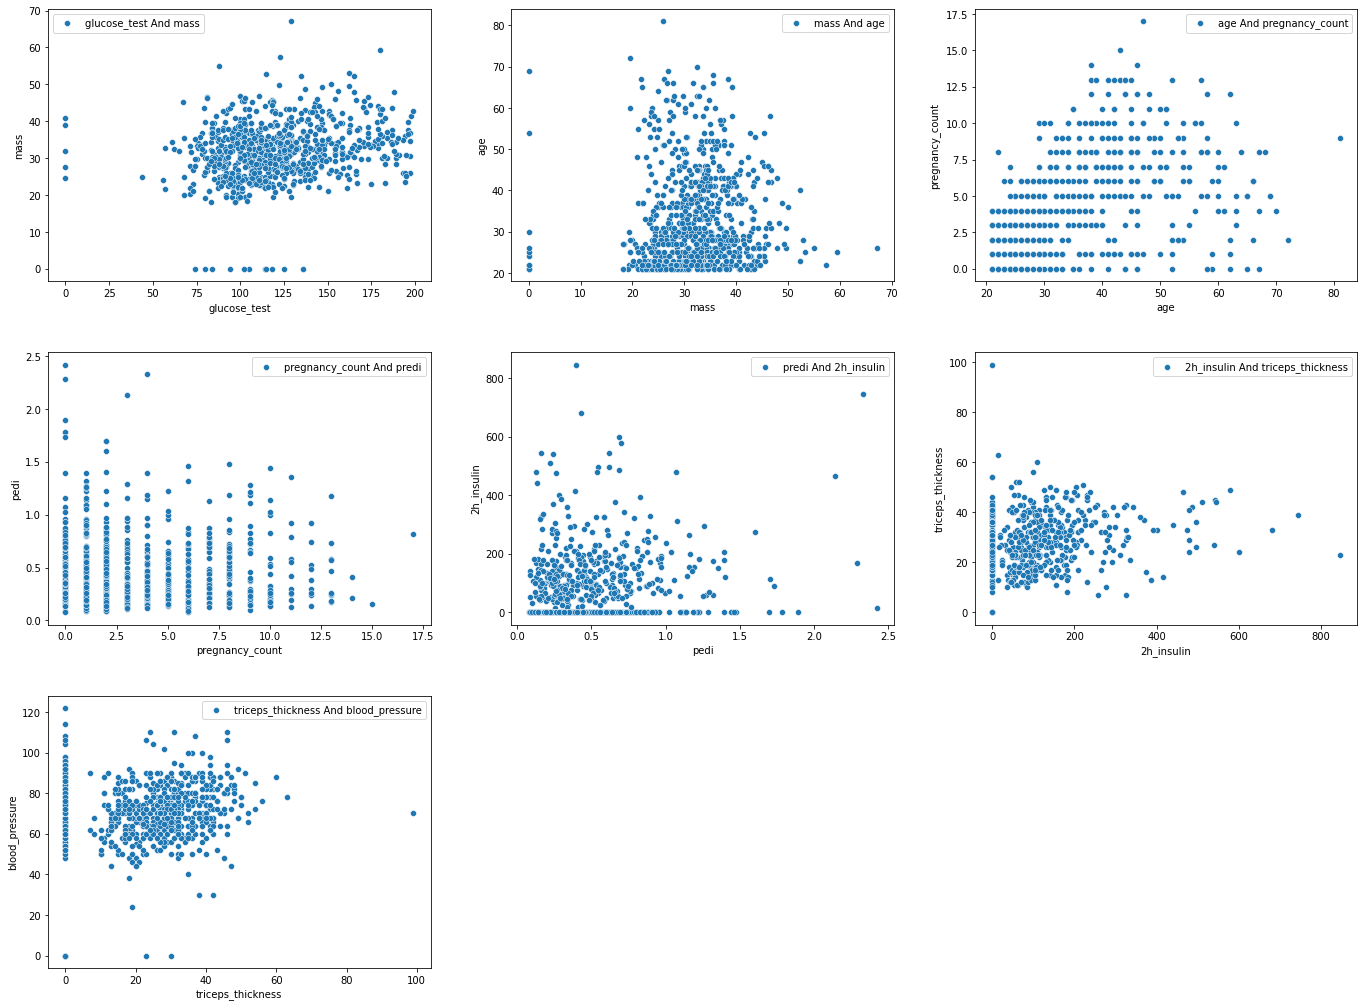

In [125]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
fig.tight_layout(pad=5)



sns.scatterplot(df.glucose_test,df.mass, ax=ax[0,0])
ax[0,0].legend(['glucose_test And mass'])

sns.scatterplot(df.mass, df.age, ax=ax[0,1])
ax[0, 1].legend(['mass And age'])


sns.scatterplot(df.age, df.pregnancy_count, ax=ax[0,2])
ax[0, 2].legend(['age And pregnancy_count'])

sns.scatterplot(df.pregnancy_count, df.pedi, ax=ax[1,0])
ax[1, 0].legend(['pregnancy_count And predi'])

sns.scatterplot(df.pedi, df['2h_insulin'], ax=ax[1, 1])
ax[1, 1].legend(['predi And 2h_insulin'])

sns.scatterplot(df['2h_insulin'], df.triceps_thickness, ax=ax[1, 2])
ax[1, 2].legend(['2h_insulin And triceps_thickness'])

sns.scatterplot(df.triceps_thickness, df.blood_pressure, ax=ax[2, 0])
ax[2, 0].legend(['triceps_thickness And blood_pressure'])

ax[2,1].set_axis_off()
ax[2,2].set_axis_off()

plt.show()


It is obvious that for (pregnancy_count, predi) and (age, pregnancy_count) we can say they have linear dependency.

## Q3

### (a)
create a normalize function using the equation below
\begin{equation}
x_{norm} = \frac{x- \mu_x}{\sigma_x}
\end{equation}
normalize the third attribute on pima dataset, then report the values for the first 5 entries on dataset.

In [2]:
## column names are used from ```pima-indians-diabetes.name``` file
cols = ['pregnancy_count', 'glucose_test', 'blood_pressure', 'triceps_thickness', '2h_insulin', 'mass', 'pedi', 'age', 'label']

df = pd.read_csv('hw1_data/pima/pima-indians-diabetes.data', index_col=False ,names=cols)
df.head()

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
def normalize(attrib):
    """
    normalize an attribute using its mean and standard deviation

    INPUTS:
    --------
    attrib: a pandas series, the original unormalized attribute

    OUTPUT:
    --------
    normalized:  the normalized attribute
    """

    mu = attrib.mean()
    sigma = attrib.std()

    normalized = (attrib - mu) / sigma
    return normalized

## third attribute is blood pressure
blood_pressure_norm = normalize(df.blood_pressure)
pd.DataFrame(blood_pressure_norm)

,blood_pressure
0,0.149543
1,-0.160441
2,-0.263769
3,-0.160441
4,-1.503707
...,...
763,0.356200
764,0.046215
765,0.149543
766,-0.470426


In [4]:
## normalize first 5 attribute of the function
normalize(df[['pregnancy_count', 'glucose_test', 'blood_pressure', 'triceps_thickness', '2h_insulin']])

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin
0,0.639530,0.847771,0.149543,0.906679,-0.692439
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221
4,-1.141108,0.503727,-1.503707,0.906679,0.765337
...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464
764,-0.547562,0.034575,0.046215,0.405181,-0.692439
765,0.342757,0.003299,0.149543,0.154433,0.279412
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439


In [19]:
new_df = df[['pregnancy_count', 'glucose_test', 'triceps_thickness', '2h_insulin']].copy()
new_df['normalized_blood_pressure'] = blood_pressure_norm
new_df.head()

,pregnancy_count,glucose_test,triceps_thickness,2h_insulin,normalized_blood_pressure
0,6,148,35,0,0.149543
1,1,85,29,0,-0.160441
2,8,183,0,0,-0.263769
3,1,89,23,94,-0.160441
4,0,137,35,168,-1.503707


### (b)

In [155]:
def discretize_attribute(attribute ,bins=10, verbose=False):
    """
    discretize a continues attribute and make the intervals the bins size

    INPUTS:
    --------
    attribute: pandas series of **one column**
    bins:  the interval space for each class, default is 10
    verbose: print the each stage output if True, default is False

    OUTPUT:
    --------
    pandas dataframe of the discrite values of an attribute 
    """
    list = np.empty((1,len(attribute.columns)))

    ## each bin length 
    bin_len = attribute.max().max() / bins
    # bin_len = int(bin_len)

    if verbose: print(f'bin length: {bin_len}')
    
    ## counter to iterate the intervals
    interval = 0
    while interval < attribute.max().max():
        ## find the attributes within the interval and drop na (NAN values are thoes who are not in the interval)
        conditioned_data = attribute.where((interval < attribute) & (attribute < interval + bin_len)).dropna().values
        
        if verbose: print(conditioned_data)
        
        ## To discretize the attributes set all the values to the mean of interval we have
        conditioned_data[True] = (interval + bin_len) / 2

        list = np.append(list, conditioned_data, axis=0 )
        ## iterate the next intervals
        interval += bin_len


    return pd.DataFrame(list, columns=attribute.columns, dtype='float32')
    

attrib = df[['blood_pressure']]
df_discrete_blood_pressure =  discretize_attribute(attrib, 10)
df_discrete_blood_pressure


,blood_pressure
0,0.000000
1,12.200000
2,18.299999
3,18.299999
4,24.400000
...,...
728,61.000000
729,61.000000
730,61.000000
731,61.000000


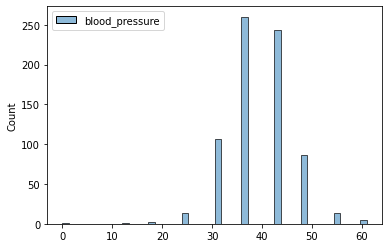

In [151]:
sns.histplot(df_discrete_blood_pressure)
plt.show()

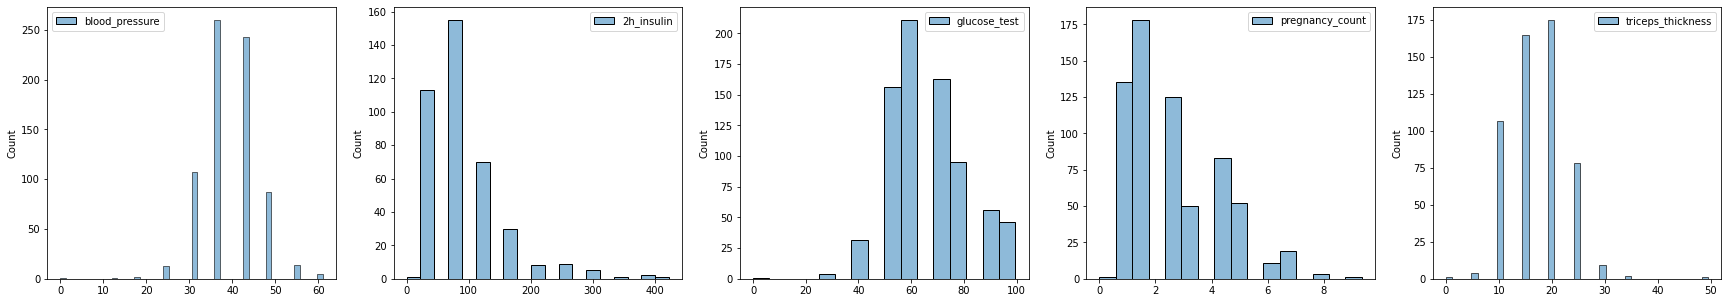

In [164]:
df_discrete_pregnancy = discretize_attribute(df[['pregnancy_count']], 10)
df_discrete_glucose_test = discretize_attribute(df[['glucose_test']], 10)
df_discrete_triceps_thickness = discretize_attribute(df[['triceps_thickness']], 10)
df_discrete_2h_insulin = discretize_attribute(df[['2h_insulin']], 10)

fig, axes = plt.subplots(1, 5, figsize=(30, 5))
sns.histplot(df_discrete_blood_pressure, ax=axes[0])
sns.histplot(df_discrete_2h_insulin, ax=axes[1])
sns.histplot(df_discrete_glucose_test, ax=axes[2])
sns.histplot(df_discrete_pregnancy, ax=axes[3])
sns.histplot(df_discrete_triceps_thickness, ax=axes[4])

plt.show()

## Q4

### (a)

In [2]:
## column names are used from ```pima-indians-diabetes.name``` file
cols = ['pregnancy_count', 'glucose_test', 'blood_pressure', 'triceps_thickness', '2h_insulin', 'mass', 'pedi', 'age', 'label']

df = pd.read_csv('hw1_data/pima/pima-indians-diabetes.data', index_col=False ,names=cols)
df.head()

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_class_0 = df[df.label == 0].copy()
df_class_1 = df[df.label == 1].copy()

In [6]:
df_class_0.describe()

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [7]:
df_class_1.describe()

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


### (b)

In [11]:
## we would choose randomly an index with the probability of 66% 
np.random.choice(df.index, )

pregnancy_count       1.000
glucose_test         93.000
blood_pressure       70.000
triceps_thickness    31.000
2h_insulin            0.000
mass                 30.400
pedi                  0.315
age                  23.000
label                 0.000
Name: 767, dtype: float64

## Validation schemes
### (a) K-fold Cross Validation

In [24]:
def kfold_crossvalidation(data, k, m):
    """
    K-fold cross validation 
    Note: test data is equavalent the validation data in normal machine learning models (Because it is used to evaluate one model)

    INPUTS:
    --------
    data: pandas dataframe containing feature vectors as rows
    k: positive integer, the number of folds
    m: target output 
    train_split:  the fraction of data that is used to split for training, default is 0.7

    OUTPUTS:
    ---------
    training_data: multi-dimensinal array of training data, each index contains the dataset for K-fold number
    test_data: multi-dimensinal array of test data, each ```index+1``` contains the dataset for each K-fold number
    """
    ## get the length of data to split it
    dataframe_size = len(data)

    ## find the length of each split
    # training_size = int(dataframe_size * train_split)
    # test_size = dataframe_size - training_size

    ## empty arrays to save data into it
    training_data = []
    test_data = []

    ## find the split size
    split = int(dataframe_size / k)

    ## split the data into k-fold and add the folds into the arrays
    for i in range(k):
        start_idx = int(i*split)
        end_idx = int((i+1)*split)

        test = data.iloc[start_idx:end_idx].copy()
        ## add the label column to corresponding index
        test['label'] = m.iloc[start_idx: end_idx]
        
        
        ## choose other part of dataset as train
        train = pd.concat([data, test, test]).drop_duplicates(keep=False)
        train['label'] = m.iloc[train.index]
        
        training_data.append(train)
        test_data.append(test)

    return training_data, test_data


In [29]:
K = 5
training_folds, test_folds = kfold_crossvalidation(df, K, df.label )

In [26]:
## check the K=1 test data fold
test_folds[0]

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
148,5,147,78,0,0,33.7,0.218,65,0
149,2,90,70,17,0,27.3,0.085,22,0
150,1,136,74,50,204,37.4,0.399,24,0
151,4,114,65,0,0,21.9,0.432,37,0


In [27]:
## check K=1 fold training set 
training_folds[0]

,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
153,1,153,82,42,485,40.6,0.687,23,0
154,8,188,78,0,0,47.9,0.137,43,1
155,7,152,88,44,0,50.0,0.337,36,1
156,2,99,52,15,94,24.6,0.637,21,0
157,1,109,56,21,135,25.2,0.833,23,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
## we can see that the test and train summation size matches the whole dataframe
for k in range(K):
    ## does it maches the whole dataset size? (condition variable)
    condition = (len(df) == (len(training_folds[k]) + len(test_folds[k]))) 
    print(f'Fold K={k+1}, the summation matches the whole set, {condition}')

Fold K=1, the summation matches the whole set, True
Fold K=2, the summation matches the whole set, True
Fold K=3, the summation matches the whole set, True
Fold K=4, the summation matches the whole set, True
Fold K=5, the summation matches the whole set, True


### (b) Bootstraping

In [43]:
def bootstrap1(data):
    """
    Demonstrate one iteration of bootstraping method (it is a with replacement method)

    INPUT:
    -------
    data: a pandas dataframe, containing our data

    OUPUTS:
    --------
    train_data: pandas dataframe of a sample data
    test_data: pandas dataframe of sample data, the data that are not included in train_data
    """
    ## find the length of our data (how many data rows we have)
    data_length = len(data)
    
    ## the indexes to be chosen from original data 
    indexes = np.random.randint(data_length, size=data_length)
    
    ## create the training set
    train_data = df.iloc[indexes].copy()

    ## choose the test set, (The data that is omited from training set)
    test_data = pd.concat([data,train_data, train_data]).drop_duplicates(keep=False)

    return train_data, test_data

In [44]:
bootstrap_train, bootstrap_test = bootstrap1(df)

In [48]:
## check the training set length with original data
len(bootstrap_train) == len(df)

True

In [51]:
print(len(bootstrap_train))
bootstrap_train.head()

768


,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
78,0,131,0,0,0,43.2,0.270,26,1
475,0,137,84,27,0,27.3,0.231,59,0
279,2,108,62,10,278,25.3,0.881,22,0
609,1,111,62,13,182,24.0,0.138,23,0
30,5,109,75,26,0,36.0,0.546,60,0


In [52]:
print(len(bootstrap_test))
bootstrap_test.head()

275


,pregnancy_count,glucose_test,blood_pressure,triceps_thickness,2h_insulin,mass,pedi,age,label
1,1,85,66,29,0,26.6,0.351,31,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1


## Q7
### (f)

In [10]:
def poisson_distribution(X,lambda1):
    """
    poisson distribution function

    INPUT:
    --------
    X: integer or an array of integers, the input value
    lambda1: float, hyperparameter to set 

    OUTPUT:
    ---------
    probabiltiy: type is same as input, the probability distribution of X
    """
    ## calculate the value above the division and below separately
    above_division = np.exp(- lambda1) * np.power(lambda1, X)
    under_division = scipy.special.factorial(X)

    
    return np.divide(above_division, under_division)

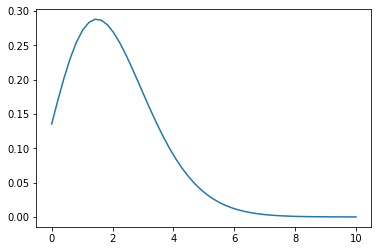

In [15]:
## parameter lambda = 2
X = np.linspace(0, 10, 50)
Y1 = poisson_distribution(X, lambda1=2)
plt.plot(X, Y1)
plt.show()

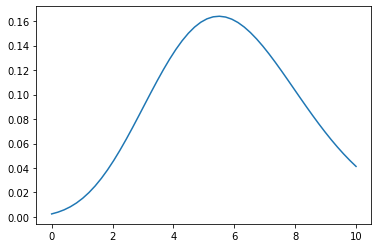

In [17]:
## parameter lambda = 6
X = np.linspace(0, 10, 50)
Y1 = poisson_distribution(X, lambda1=6)
plt.plot(X, Y1)
plt.show()

### (g)

The Maximum Likelihood estimation for poisson distribution is as below (Calculated in Q7 part c)
\begin{equation}
\lambda = \sum_{x=0}^{n} \frac{1}{x}
\end{equation}

In [33]:
## Read the data from poisson.txt file
X_poisson = np.fromfile('hw1_data/poisson.txt', dtype=float, sep='\n')
## Maximum Likelihood estimation
lambda1 = np.sum(1/X_poisson)

In [34]:
print('Maximum Likelihood Estimated Parameter for poisson.txt: ', lambda1)

Maximum Likelihood Estimated Parameter for poisson.txt:  6.20952380952381


### (h)

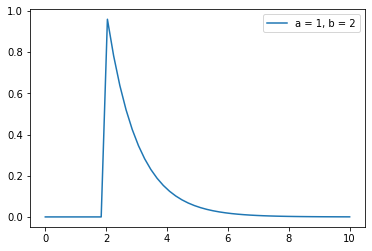

In [31]:
X = np.linspace(0, 10, 50)
gamma_model = scipy.stats.gamma(1,2)
plt.plot(X, gamma_model.pdf(X))
plt.legend(['a = 1, b = 2'])
plt.show()

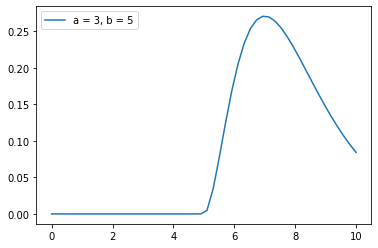

In [32]:
X = np.linspace(0, 10, 50)
gamma_model = scipy.stats.gamma(3,5)
plt.plot(X, gamma_model.pdf(X))
plt.legend(['a = 3, b = 5'])
plt.show()

### (i)
Posterior density is
\begin{equation}
p(\lambda | a,b) = \frac{1}{b^a \Gamma(a)} \lambda^{a-1} e^{-\frac{\lambda}{b}}
\end{equation}
And assuming the poisson.txt file we found the proper value for lambda

In [48]:
def posterior_poisson(X, a,b, lambda1):
    """
    posterior for poisson distribution

    INPUTS:
    -------
    X: values to calculate the posterior
    a,b: parameters for gamma distribution

    OUTPUT:
    --------
    probability: floating number or an array
    """
    ## we divided the function in 3 parts then multiplied it
    gamma_distro = scipy.stats.gamma(a)
    values = gamma_distro.pdf(X)
    p1 = (b ** a) * values
    p1 = 1 / p1

    p2 = lambda1 ** (a-1)
    
    p3 = np.exp(-lambda1 / b)

    probability = p1 * p2 * p3
    print(len(probability))
    return probability


25


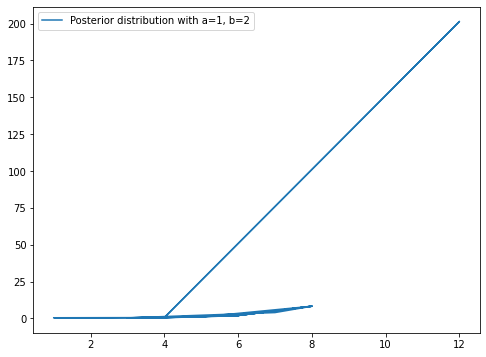

In [58]:
Y = posterior_poisson(X_poisson, 3, 5, lambda1)
plt.figure(figsize=(8,6))
plt.plot(X_poisson,Y)
plt.legend(['Posterior distribution with a=1, b=2'])
plt.show()

It can be seen from the plot that the posterior is not a function and it have multiple values of x for each y in range of 4 to 6. 